# Project 4: Web Scraping Job Postings

### Webscraping was done using selenium on the MycareersFuture website.

#### 1. Used different keywords such as Data, machine learning, python, data science, data analytics, data scientist, python, big data, deep learning etc to get the links and other details and the results were stored on df-1Feb.csv file

#### 2. Using the links got then scraped all the required information such as job titles, salary, job descriptions, job requirements, comapny, industry, emplyment types and stored in final_df3Feb.csv. This file is used for further analysis.

In [1]:
#### imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as patches
from matplotlib.path import Path
import pandas as pd

%matplotlib inline

## Loading Data

### I had several questing before starting my analysis

In [2]:
# groupby based on seniority, industry, employment_types find the variation in salary type
# Keep this as the main category index - seniority(different types):
    #1. whats is the most common jobtitle and whats the expected salary(for different employment types)
    #2. Does the govenment support affects the salary
    #3. which industry is getting more govenment support
    #4. Where most companies located
    #5. predict what is the most common requirements for different seniority roles
    #6. predict what is the common job discription based on seniority
    #7. which industry have more data science roles and which one we can look into.

In [3]:
#loading the scarped data file
df = pd.read_csv('final_df3Feb.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(3)

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,"$6,000to$10,000",Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,Government support available
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,"Permanent, Full Time",Professional,Engineering,"$5,000to$7,000",Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,Government support available
2,Data Engineer,TITANSOFT PTE. LTD.,Permanent,Executive,Professional Services,"$3,000to$8,000",Monthly,"If you believe data makes the world go round, ...",What we are looking for in a Data Engineer Qua...,https://www.mycareersfuture.sg/job/data-engine...,Central,Government support available


## Feature Engineering

### 1. seniority 

In [6]:
#fill the null value by NA
df.seniority=df.seniority.fillna("NA")

In [7]:
#split the seniority column to reduce the length 
df.seniority=df.seniority.apply(lambda x: x.split(',')[0])

In [8]:
df.seniority.value_counts()

Professional         255
Executive            154
Manager               85
Senior Executive      81
Middle Management     79
Non-executive         56
Senior Management     40
Junior Executive      36
NA                    27
Fresh/entry level     25
Name: seniority, dtype: int64

### 2. Salary

Separating the salary column into min and maximum salary



In [9]:
df.salary=df.salary.apply(lambda x: x.replace('$',''))
df.salary=df.salary.apply(lambda x: x.replace(',',''))

df['min_salary'] = df.salary.apply(lambda x: x.split('to')[0])
df['max_salary'] = df.salary.apply(lambda x: x.split('to')[-1])

### 3. Gov_support

If government support available tehn impute 'yes' else impute 'no'

In [10]:
df['gov_support']=df.gov_support.apply(lambda x: 'yes' if x=='Government support available' else 'no')

### 4 Employment_type

Removing the entries with low counts. For example temporary, internship and part-time jobs have only one value. As tehse data dont have significant contribution to our results. Those columns were removed. 

In [11]:
df.employment_type.value_counts()

Full Time                           335
Permanent                           170
Permanent, Full Time                141
Contract, Full Time                  98
Contract                             65
Permanent, Contract                   8
Permanent, Contract, Full Time        7
Internship                            5
Permanent, Full Time, Internship      1
Part Time, Full Time                  1
Part Time                             1
Part Time, Contract                   1
Temporary                             1
Temporary, Contract, Full Time        1
Full Time, Internship                 1
Contract, Full Time, Internship       1
Freelance, Full Time, Flexi work      1
Name: employment_type, dtype: int64

In [12]:
#split the employment_type column to reduce the length 
df.employment_type=df.employment_type.apply(lambda x: x.split(',')[0])

In [13]:
df.employment_type.value_counts()

Full Time     336
Permanent     327
Contract      164
Internship      5
Part Time       3
Temporary       2
Freelance       1
Name: employment_type, dtype: int64

In [14]:
#Removing the entries with low counts.

df=df[df.employment_type != 'Internship']
df=df[df.employment_type != 'Part Time']
df=df[df.employment_type != 'Temporary']
df=df[df.employment_type != 'Freelance']


In [15]:
df.employment_type.value_counts()

Full Time    336
Permanent    327
Contract     164
Name: employment_type, dtype: int64

### 6. job_titles

In [16]:
# so many job_titles. so it has to be engineered
df.job_titles.value_counts()

Data Scientist                                                               46
Data Engineer                                                                26
Research Fellow                                                              17
Data Analyst                                                                 17
Research Associate                                                            8
Software Engineer                                                             8
Software Consultant                                                           7
Senior Software Engineer                                                      6
DevOps Engineer                                                               6
Project Officer                                                               5
Research Engineer                                                             5
Senior Research Engineer                                                      5
Senior Data Scientist                   

In [17]:
#split the employment_type column to reduce the length 
df.job_titles=df.job_titles.apply(lambda x: x.split('/')[0])

In [18]:
#split the employment_type column to reduce the length 
df.job_titles=df.job_titles.apply(lambda x: x.split('-')[0])

In [19]:
#df.job_titles.value_counts()

### 7. average salary

In [20]:
#the type of salary is object
df.min_salary.dtypes

dtype('O')

In [21]:
df.shape

(827, 14)

In [22]:
#removing the data with no salary info

df = df[df.min_salary != 'Salary undisclosed']

In [23]:
df = df[df.max_salary != 'Salary undisclosed']

In [24]:
df.shape

(754, 14)

In [25]:
#droping data without salary detail and then converting into numeric

#df.min_salary(dropna=True) 


In [26]:
df['min_salary'].isnull().sum()



0

In [27]:
df['max_salary'].isnull().sum()

0

In [28]:
df['max_salary'] = df['max_salary'].convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [29]:
df['min_salary'] = df['min_salary'].convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [30]:
#fill the null value by NA
df.min_salary=df.min_salary.fillna(0)

In [31]:
df.min_salary.dtypes

dtype('int64')

In [32]:
df.max_salary.dtypes

dtype('int64')

In [33]:
df['avg_salary'] = (df['min_salary']+df['max_salary'])/2

In [34]:
df['avg_salary'].median()


6750.0

In [35]:
#creating a column denoting salarys less than median average salary as 0 and above to be 1

df['salary_med']=df.avg_salary.apply(lambda x: 1 if x>= 6750 else 0)

In [36]:
df.head()

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0
2,Data Engineer,TITANSOFT PTE. LTD.,Permanent,Executive,Professional Services,3000to8000,Monthly,"If you believe data makes the world go round, ...",What we are looking for in a Data Engineer Qua...,https://www.mycareersfuture.sg/job/data-engine...,Central,yes,3000,8000,5500.0,0
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1
4,Senior ETL and Data Engineer,SCHELLDEN GLOBAL SERVICES,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Must have 4 to 6 years of experience using SQ...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1


In [37]:
#this is a balanced class, so normal classification problem 

df['salary_med'].value_counts()

1    391
0    363
Name: salary_med, dtype: int64

### 8. locations

In [38]:
df.location.value_counts()

Central                        299
East                           117
South                          111
Islandwide                      80
West                            62
North                           22
East, Central                    4
South, Central                   4
North, Central                   4
South, East, Central             2
North, South, East, Central      1
East, West                       1
North, West                      1
Name: location, dtype: int64

In [39]:
#fill the null value by NA
df.location=df.location.fillna("NA")

In [40]:
#split the employment_type column to reduce the length 
df.location=df.location.apply(lambda x: x.split(',')[0])

In [41]:
df.location.value_counts()

Central       299
East          122
South         117
Islandwide     80
West           62
NA             46
North          28
Name: location, dtype: int64

### 9. industrys

In [42]:
#fill the null value by NA
df.industrys=df.industrys.fillna("NA")

In [43]:
df.industrys.value_counts()

Information Technology                                                                                          340
Banking and Finance                                                                                              48
Sciences / Laboratory / R&D                                                                                      47
Engineering                                                                                                      47
Information Technology, Public / Civil Service                                                                   40
Others                                                                                                           33
Engineering, Information Technology                                                                              18
Engineering, Sciences / Laboratory / R&D                                                                         16
Consulting                                                              

In [44]:
#split the employment_type column to reduce the length 
df.industrys=df.industrys.apply(lambda x: x.split('/')[0])

In [45]:
#split the employment_type column to reduce the length 
df.industrys=df.industrys.apply(lambda x: x.split(',')[0])

In [46]:
df.industrys.value_counts()

Information Technology       393
Engineering                  101
Banking and Finance           60
Sciences                      47
Others                        34
Consulting                    32
Advertising                   12
Logistics                     10
Admin                          9
Education and Training         7
Sales                          6
Accounting                     6
Human Resources                6
Marketing                      5
Professional Services          4
General Management             3
Risk Management                3
Public                         2
Healthcare                     2
Customer Service               2
Design                         2
Insurance                      1
Environment                    1
Medical                        1
Building and Construction      1
Real Estate                    1
Telecommunications             1
Manufacturing                  1
Events                         1
Name: industrys, dtype: int64

In [47]:
#removing the irrelevant industry 

df = df[df.industrys.isin(['Information Technology','Engineering', 'Banking and Finance'])]



In [48]:
df.industrys.value_counts()

Information Technology    393
Engineering               101
Banking and Finance        60
Name: industrys, dtype: int64

In [49]:
df.shape



(554, 16)

### 10. job_requirements

In [50]:
df.job_requirements.isnull().sum()

42

In [51]:
#fill the null value by NA
df.job_requirements=df.job_requirements.fillna("NA")

In [52]:
df.head()

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1
4,Senior ETL and Data Engineer,SCHELLDEN GLOBAL SERVICES,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Must have 4 to 6 years of experience using SQ...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1
5,Senior ETL and Data Engineer,SCHELLDEN GLOBAL PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1


### 11. salary_terms

In [53]:
df.salary_terms.value_counts()

Monthly     542
Annually     12
Name: salary_terms, dtype: int64

In [54]:
#As we are not sure whether the annual salary terms includes the bonus or 13 month salary,
#it would affect our predictions thereby removing the entries with annual salary terms. 

df = df[df.salary_terms != 'Annually']

In [55]:
df.salary_terms.value_counts()

Monthly    542
Name: salary_terms, dtype: int64

In [56]:

df['salary_med'].value_counts()

1    289
0    253
Name: salary_med, dtype: int64

## NLP for extracting features for job description, requirements and titles

### LDA - Job descriptions
### Preprocessing

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [59]:
job_des = cv.fit_transform(df['job_descriptions'])


In [60]:
job_des

<542x3928 sparse matrix of type '<class 'numpy.int64'>'
	with 53534 stored elements in Compressed Sparse Row format>

### LDA

In [61]:
from sklearn.decomposition import LatentDirichletAllocation

In [62]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)

In [63]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(job_des)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [64]:
len(cv.get_feature_names())

3928

In [65]:
import random

In [66]:
for i in range(10):
    random_word_id = random.randint(0,3271)
    print(cv.get_feature_names()[random_word_id])

arise
path
family
execute
compromised
maintains
centralised
application
organizations
proponents


In [67]:
len(LDA.components_)

10

In [68]:
LDA.components_

array([[0.10001953, 0.98145193, 0.10000634, ..., 0.10001599, 0.1       ,
        0.1       ],
       [0.10001342, 0.10000233, 2.51752218, ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1000027 , 0.10000209, ..., 2.10000476, 0.10000204,
        0.1       ],
       ...,
       [0.10000491, 0.1       , 0.1       , ..., 0.10000158, 5.09999508,
        0.1       ],
       [0.10001427, 0.10000763, 4.05169111, ..., 2.32724084, 0.10000033,
        4.1       ],
       [0.10000097, 0.1       , 0.10000193, ..., 0.1000212 , 0.10000017,
        0.1       ]])

In [69]:
len(LDA.components_[0])

3928

In [70]:
single_topic = LDA.components_[0]

In [71]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([2331,  768, 1141, ..., 1326, 2030,  922])

In [72]:
# Word least representative of this topic
single_topic[768]

0.10000000000108517

In [73]:
# Word most representative of this topic
single_topic[922]

324.57452997439776

In [74]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([2996, 3892, 1031, 3280,  172, 3147, 2119, 1326, 2030,  922])

In [75]:
top_word_indices = single_topic.argsort()[-10:]

In [76]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

research
work
development
skills
ai
science
machine
experience
learning
data


In [77]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['software', 'solutions', 'business', 'develop', 'analytics', 'research', 'work', 'development', 'skills', 'ai', 'science', 'machine', 'experience', 'learning', 'data']


THE TOP 15 WORDS FOR TOPIC #1
['techniques', 'responsibilities', 'algorithms', 'consumer', 'help', 'deep', 'analysis', 'work', 'business', 'science', 'team', 'models', 'machine', 'learning', 'data']


THE TOP 15 WORDS FOR TOPIC #2
['execute', 'existing', 'like', 'experience', 'systems', 'ability', 'issues', 'big', 'working', 'customers', 'technical', 'product', 'engineering', 'team', 'data']


THE TOP 15 WORDS FOR TOPIC #3
['ensure', 'provide', 'implementation', 'service', 'development', 'automation', 'systems', 'support', 'experience', 'software', 'cloud', 'services', 'management', 'infrastructure', 'security']


THE TOP 15 WORDS FOR TOPIC #4
['ai', 'financial', 'approach', 'reconciliation', 'fintech', 'based', 'development', 'companies', 'management', 'solutions', 'tookitaki', 'regulato

In [78]:
topic_results = LDA.transform(job_des)

In [79]:
topic_results.shape

(542, 10)

In [80]:
topic_results[0]

array([0.00108711, 0.37124698, 0.00108718, 0.00108718, 0.00108703,
       0.00108709, 0.00108712, 0.00108713, 0.62005597, 0.00108721])

In [81]:
topic_results[0].round(2)

array([0.  , 0.37, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  ])

In [82]:
topic_results[0].argmax()

8

In [83]:
topic_results.argmax(axis=1)

array([8, 8, 8, 8, 8, 8, 1, 8, 8, 0, 0, 0, 8, 8, 8, 8, 8, 5, 8, 0, 1, 3,
       6, 6, 8, 0, 7, 5, 8, 3, 9, 3, 8, 3, 3, 3, 3, 3, 8, 3, 5, 2, 3, 0,
       5, 3, 2, 5, 2, 3, 8, 8, 8, 8, 8, 8, 3, 3, 0, 8, 0, 0, 0, 8, 8, 8,
       8, 8, 9, 2, 0, 8, 1, 1, 1, 1, 1, 1, 8, 8, 8, 0, 0, 3, 3, 8, 2, 2,
       8, 8, 8, 8, 8, 0, 1, 0, 9, 8, 0, 0, 2, 2, 8, 1, 1, 1, 1, 3, 8, 2,
       1, 1, 5, 5, 8, 8, 0, 5, 1, 5, 0, 8, 8, 0, 0, 8, 8, 8, 7, 8, 2, 0,
       5, 5, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 1, 8, 1, 1, 1, 1, 8, 1, 8, 8,
       1, 8, 8, 8, 8, 0, 1, 8, 5, 5, 0, 0, 8, 0, 5, 8, 0, 1, 0, 1, 8, 0,
       0, 0, 8, 5, 5, 8, 0, 8, 8, 0, 0, 8, 4, 4, 4, 5, 5, 8, 1, 0, 1, 1,
       0, 0, 7, 0, 0, 8, 0, 0, 0, 1, 8, 8, 6, 6, 1, 1, 8, 5, 8, 4, 4, 1,
       0, 0, 0, 9, 0, 1, 0, 0, 1, 5, 5, 5, 8, 9, 0, 3, 5, 8, 5, 8, 6, 6,
       1, 1, 8, 8, 7, 8, 8, 0, 0, 0, 6, 6, 8, 8, 5, 8, 8, 8, 0, 8, 5, 5,
       0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 0, 5, 5, 8, 7, 1, 0, 0, 8, 5, 5, 0,
       0, 0, 8, 8, 1, 8, 8, 8, 3, 8, 9, 9, 9, 9, 9,

In [84]:
df['job_description_topic'] = topic_results.argmax(axis=1)

In [85]:
df.head()

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med,job_description_topic
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1,8
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0,8
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8
4,Senior ETL and Data Engineer,SCHELLDEN GLOBAL SERVICES,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Must have 4 to 6 years of experience using SQ...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8
5,Senior ETL and Data Engineer,SCHELLDEN GLOBAL PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8


In [86]:
df.job_description_topic.value_counts()

8    183
0    100
3     54
5     52
1     49
6     37
7     20
2     19
9     15
4     13
Name: job_description_topic, dtype: int64

##  Non-Negative Matrix Factorization(NMF) -Job requirements 
### Preprocessing

In [87]:
#Use TF-IDF Vectorization to create a vectorized document term matrix. 

from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [89]:
req= tfidf.fit_transform(df['job_requirements'])

In [90]:
req

<542x2805 sparse matrix of type '<class 'numpy.float64'>'
	with 34309 stored elements in Compressed Sparse Row format>

In [91]:
from sklearn.decomposition import NMF

In [92]:
#Using Scikit-Learn an instance of NMF with 5 expected components and random_state=42 was used 

nmf_model = NMF(n_components=10,random_state=42)

In [93]:
nmf_model.fit(req)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [94]:
#printing top 15 words per topic

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['skills', 'visualization', 'etl', 'statistics', 'large', 'sql', 'tools', 'analysis', 'strong', 'analytics', 'modeling', 'business', 'big', 'experience', 'data']


THE TOP 15 WORDS FOR TOPIC #1
['excelling', 'exceptional', 'exhaustive', 'exceptionally', 'excited', 'exciting', 'execute', 'executes', 'executing', 'execution', 'executive', 'executives', 'exchange', 'zos', 'na']


THE TOP 15 WORDS FOR TOPIC #2
['knowledge', 'plus', 'analytical', 'able', 'possess', 'written', 'communication', 'excellent', 'problem', 'solving', 'good', 'strong', 'ability', 'work', 'skills']


THE TOP 15 WORDS FOR TOPIC #3
['frameworks', 'phd', 'text', 'techniques', 'plus', 'vision', 'python', 'tensorflow', 'programming', 'analytics', 'experience', 'algorithms', 'machine', 'deep', 'learning']


THE TOP 15 WORDS FOR TOPIC #4
['spark', 'cloud', 'hands', 'python', 'web', 'good', 'hadoop', 'years', 'spring', 'aws', 'working', 'knowledge', 'development', 'java', 'experience']


THE TO

In [95]:
#Add a new column to the dataframe that labels the job requirements

In [96]:
topic_results = nmf_model.transform(req)

In [97]:
topic_results.argmax(axis=1)

df['job_req_topics'] = topic_results.argmax(axis=1)

df.head(3)

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med,job_description_topic,job_req_topics
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1,8,0
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0,8,0
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4


In [98]:
df['job_req_topics'].value_counts()

4    96
8    80
0    78
2    76
6    73
3    65
1    42
9    13
7    12
5     7
Name: job_req_topics, dtype: int64

##  Non-Negative Matrix Factorization(NMF) -Job titles
### Preprocessing

In [99]:
#Use TF-IDF Vectorization to create a vectorized document term matrix. 

from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [101]:
titles= tfidf.fit_transform(df['job_titles'])

In [102]:
titles

<542x156 sparse matrix of type '<class 'numpy.float64'>'
	with 1538 stored elements in Compressed Sparse Row format>

In [103]:
from sklearn.decomposition import NMF

In [104]:
#Using Scikit-Learn an instance of NMF with 5 expected components and random_state=42 was used 

nmf_model = NMF(n_components=10,random_state=42)

In [105]:
nmf_model.fit(titles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [106]:
#printing top 15 words per topic

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 7 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-7:]])
    print('\n')

THE TOP 7 WORDS FOR TOPIC #0
['banking', 'consumer', 'analytics', 'big', 'lead', 'data', 'scientist']


THE TOP 7 WORDS FOR TOPIC #1
['support', 'infrastructure', 'centre', 'center', 'devops', 'data', 'engineer']


THE TOP 7 WORDS FOR TOPIC #2
['bi', 'junior', 'science', 'risk', 'business', 'data', 'analyst']


THE TOP 7 WORDS FOR TOPIC #3
['architect', 'engineer', 'algorithm', 'backend', 'etl', 'associate', 'senior']


THE TOP 7 WORDS FOR TOPIC #4
['quantitative', 'backend', 'etl', 'stack', 'big', 'java', 'developer']


THE TOP 7 WORDS FOR TOPIC #5
['business', 'vp', 'analytics', 'assistant', 'product', 'project', 'manager']


THE TOP 7 WORDS FOR TOPIC #6
['architect', 'learning', 'machine', 'development', 'ref', 'engineer', 'software']


THE TOP 7 WORDS FOR TOPIC #7
['advanced', 'applied', 'scientist', 'engineer', 'associate', 'fellow', 'research']


THE TOP 7 WORDS FOR TOPIC #8
['management', 'database', 'datawarehouse', 'data', 'lead', 'science', 'consultant']


THE TOP 7 WORDS FOR

In [107]:
#Add a new column to the dataframe that labels the job_titles

In [108]:
topic_results = nmf_model.transform(titles)

In [109]:
topic_results.argmax(axis=1)

df['job_titles_topics'] = topic_results.argmax(axis=1)

df.head(3)

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med,job_description_topic,job_req_topics,job_titles_topics
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1,8,0,1
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0,8,0,1
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3


In [110]:
df['job_titles_topics'].value_counts()

1    97
0    87
5    60
2    54
8    47
4    46
9    42
6    39
7    36
3    34
Name: job_titles_topics, dtype: int64

In [111]:
to_drop=['job_titles','companys','salary','salary_terms','job_descriptions', 'job_requirements', 'links', 
         'min_salary', 'max_salary', 'avg_salary']

df1=df.drop(columns=to_drop, axis=1)




In [112]:
df1.head()

,employment_type,seniority,industrys,location,gov_support,salary_med,job_description_topic,job_req_topics,job_titles_topics
0,Full Time,Professional,Engineering,Central,yes,1,8,0,1
1,Permanent,Professional,Engineering,North,yes,0,8,0,1
3,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3
4,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3
5,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3


In [113]:
dummy_cols=['employment_type','seniority','industrys','location','gov_support', 
            'job_description_topic', 'job_req_topics', 'job_titles_topics']

In [114]:
df1_dummy= pd.get_dummies(df1,columns=dummy_cols,drop_first=True)
print(df1_dummy.shape)

(542, 48)


In [115]:
X=df1_dummy.drop('salary_med', axis=1)

In [116]:
y=df1.salary_med

## Modelling

### 1. LogisticRegression

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), X, y, cv=4, scoring='roc_auc')

#get scores
print(cls_scores, np.mean(cls_scores))

# fit models
logreg = LogisticRegression().fit(X, y) #AUC

[0.78606592 0.78483245 0.767306   0.6340388 ] 0.7430607933336958


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [118]:
# the score looks ok. now lets check the score of the other models

### 2. Decision Tree Classifier

#### Using GridSearchCV to find the best decision tree classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      scoring='roc_auc', 
                      n_jobs=-1)

In [120]:
# use the gridearc C model to fit the data
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    3.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [121]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 30}
0.6966041155447319


In [122]:
# printing out important features

fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
11,industrys_Engineering,0.108834
4,seniority_Manager,0.075552
0,employment_type_Full Time,0.067615
38,job_titles_topics_1,0.059928
8,seniority_Professional,0.054289
18,location_West,0.051977
34,job_req_topics_6,0.049474
28,job_description_topic_9,0.042684
35,job_req_topics_7,0.038718
9,seniority_Senior Executive,0.033332


In [123]:
# Decision tree model performs slightly lower than the logistic regression model.

# Some of the important features were noted which will be summarised at the end.

### 3. RandomForest Classifier (RFC)

In [124]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
rfc_pred = rfc.predict(X_test)

In [127]:
print(confusion_matrix(y_test,rfc_pred))

[[50 26]
 [19 68]]


In [128]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        76
           1       0.72      0.78      0.75        87

   micro avg       0.72      0.72      0.72       163
   macro avg       0.72      0.72      0.72       163
weighted avg       0.72      0.72      0.72       163



In [129]:
# RFC works better for both category when compared to decision tree and logistic classification

# The precision of lower salary category is 77% and recall of the higher salary category is 79%, 
#this shows that this classifier works better for both classes

### 4. SVM

In [130]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [131]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm = SVC(kernel=kernel, degree=3)
    scores = cross_val_score(svm, Xn, y, cv=5, scoring='roc_auc')
    sm = scores.mean()
    ss = scores.std()
    print("{} - Average score: {:0.3} +/- {:0.3}".format(kernel,sm, ss))

linear - Average score: 0.746 +/- 0.0676


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

poly - Average score: 0.74 +/- 0.0819
rbf - Average score: 0.76 +/- 0.0832
sigmoid - Average score: 0.734 +/- 0.0871


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [132]:
# cross val on linear kernel resulted in better scores so 
#used the linear kernal to build/test our final model below.

In [133]:
from sklearn.metrics import classification_report

def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, 
                            y_pred, 
                            rownames=['Actual'], 
                            colnames=['Predicted'], 
                            margins=True)
    print(confusion)
    print('')
    print(classification_report(y_true, y_pred))

In [134]:
from sklearn.model_selection import train_test_split

lin_model = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted   0   1  All
Actual                
0          59  25   84
1          28  67   95
All        87  92  179

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        84
           1       0.73      0.71      0.72        95

   micro avg       0.70      0.70      0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179



In [135]:
# SVM performance is lower than RFC

## 5. Applying Regression models to compare the results with the classification models

In [136]:
df.head()

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med,job_description_topic,job_req_topics,job_titles_topics
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1,8,0,1
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0,8,0,1
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3
4,Senior ETL and Data Engineer,SCHELLDEN GLOBAL SERVICES,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Must have 4 to 6 years of experience using SQ...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3
5,Senior ETL and Data Engineer,SCHELLDEN GLOBAL PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3


In [137]:
to_drop=['job_titles','companys','salary','salary_terms','job_descriptions', 'job_requirements', 'links', 
         'min_salary', 'max_salary', 'salary_med']

df2=df.drop(columns=to_drop, axis=1)


In [138]:
df2.head()

,employment_type,seniority,industrys,location,gov_support,avg_salary,job_description_topic,job_req_topics,job_titles_topics
0,Full Time,Professional,Engineering,Central,yes,8000.0,8,0,1
1,Permanent,Professional,Engineering,North,yes,6000.0,8,0,1
3,Full Time,Senior Executive,Information Technology,Islandwide,no,8500.0,8,4,3
4,Full Time,Senior Executive,Information Technology,Islandwide,no,8500.0,8,4,3
5,Full Time,Senior Executive,Information Technology,Islandwide,no,8500.0,8,4,3


In [139]:
dummy_cols=['employment_type','seniority','industrys','location','gov_support', 
            'job_description_topic', 'job_req_topics', 'job_titles_topics']

In [140]:
df2_dummy= pd.get_dummies(df2,columns=dummy_cols,drop_first=True)
print(df2_dummy.shape)

(542, 48)


In [141]:
X2=df2_dummy.drop('avg_salary', axis=1)

In [142]:
y2=df.avg_salary

In [143]:
#train test split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


ss = StandardScaler()
X2s_train= ss.fit_transform(X2_train)
X2s_test=ss.transform(X2_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  


In [145]:
ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X2s_train, y2_train)

print(optimal_ridge.alpha_)

390.6939937054621


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [146]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X2s_train, y2_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

911.208763205899


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [147]:
def print_cross_val_results(model,name,X,y,folds=5):
    print( '------------------------------------\n')
    print('{}-Fold Cross Validated Results for Model: '.format(folds)+ name)
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))

OLS = LinearRegression()
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso= Lasso(alpha=optimal_lasso.alpha_)

print_cross_val_results(OLS,"Linear Regression",X2s_train,y2_train)
print_cross_val_results(ridge,"Ridge Regression",X2s_train,y2_train)
print_cross_val_results(lasso,"Lasso Regression",X2s_train,y2_train)

------------------------------------

5-Fold Cross Validated Results for Model: Linear Regression
Cross-validated scores: [-0.50261556 -0.38563515 -0.2899107  -0.02639847 -0.07439497]
Mean CV R2: -0.2557909714120684
Std CV R2: 0.18136784198767006
------------------------------------

5-Fold Cross Validated Results for Model: Ridge Regression
Cross-validated scores: [ 0.08074252  0.02420364  0.15110343 -0.01771496  0.24522114]
Mean CV R2: 0.09671115429623836
Std CV R2: 0.09340172096982434
------------------------------------

5-Fold Cross Validated Results for Model: Lasso Regression
Cross-validated scores: [-0.01097052 -0.07070564 -0.0340753  -0.03214942 -0.03237913]
Mean CV R2: -0.03605600234824462
Std CV R2: 0.019300687228205486


In [148]:
# All the Regression models shows very bad results. 

## Summary:

1. RFC shows best results when compared to the others(logistic, decision tree classification, SVM and regression models)

2. The most important features that contribute the salary are as follows:

    * job titles topic:
    
        THE TOP 7 WORDS FOR TOPIC #1
        ['support', 'infrastructure', 'centre', 'center', 'devops', 'data', 'engineer’]
        
        THE TOP 7 WORDS FOR TOPIC #9
    ['solution', 'monitoring', 'support', 'specialist', 'infrastructure',
    'designer', 'application’]


    
    *job descriptions topic 2:
    
        THE TOP 15 WORDS FOR TOPIC #2
            ['execute', 'existing', 'like', 'experience', 'systems', 'ability', 
            'issues', 'big', 'working', 'customers', 'technical', 'product', 
            'engineering', 'team', 'data’]


    
    * location - West
    
    * Job requirement:
    
    
        THE TOP 15 WORDS FOR TOPIC #1
        ['excelling', 'exceptional', 'exhaustive', 'exceptionally', 'excited',
        'exciting', 'execute', 'executes', 'executing', 'execution',
        'executive', 'executives', 'exchange', 'zos', 'na’]


    *Jobtitle topic 4:
    
        THE TOP 7 WORDS FOR TOPIC #7
        
        ['advanced', 'applied', 'scientist', 'engineer', 'associate', 'fellow', 'research']

     * Industry: Engineering
    
    


## Question 2 

### Aim: To understand the features affecting the seniority (ex: professional, executive, fresh/entry etc)



In [149]:
df.head()

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,avg_salary,salary_med,job_description_topic,job_req_topics,job_titles_topics
0,Data Engineer,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Professional,Engineering,6000to10000,Monthly,"Build, deploy and manage big data solutions t...","A degree or higher in Computer Science, Elec...",https://www.mycareersfuture.sg/job/data-engine...,Central,yes,6000,10000,8000.0,1,8,0,1
1,Data Engineer,MOKA TECHNOLOGY SOLUTIONS PTE. LTD.,Permanent,Professional,Engineering,5000to7000,Monthly,Do you have a passion for data? Are you lookin...,You have: BS (MS preferred) in Computer Scien...,https://www.mycareersfuture.sg/job/data-engine...,North,yes,5000,7000,6000.0,0,8,0,1
3,Senior ETL and DATA Engineer,SMARTSOFT PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL &...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3
4,Senior ETL and Data Engineer,SCHELLDEN GLOBAL SERVICES,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Must have 4 to 6 years of experience using SQ...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3
5,Senior ETL and Data Engineer,SCHELLDEN GLOBAL PTE. LTD.,Full Time,Senior Executive,Information Technology,6000to11000,Monthly,Responsibilities include understanding ETL & D...,Experiences: Must have 4 to 6 years of experi...,https://www.mycareersfuture.sg/job/senior-etl-...,Islandwide,no,6000,11000,8500.0,1,8,4,3


In [150]:
df.seniority.value_counts()

Professional         177
Executive            112
Senior Executive      59
Middle Management     58
Manager               54
Non-executive         24
Senior Management     24
Junior Executive      22
Fresh/entry level     11
NA                     1
Name: seniority, dtype: int64

In [151]:
#df = df[df.seniority != 'NA']

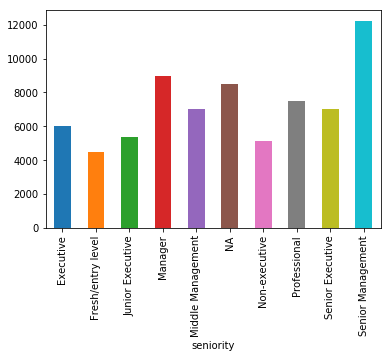

In [152]:
# Based on the salary the seniority group was classified into three category. Manager and Senior Executive was given 2, 
#Middle Management, professional, senior executive was given 1 and others as 0

df.groupby(['seniority'])['avg_salary'].median().plot.bar()


In [153]:
df['seniority_med']= df.seniority.apply(lambda x:2 if x== 'Manager'or x=='Senior Executive' else 1 if x=='Middle Management' or x=='Professional' or x=='Senior Executive'
                                        else 0)



In [154]:
#checking for class balance. it shows that its a balance class

df['seniority_med'].value_counts()

1    235
0    194
2    113
Name: seniority_med, dtype: int64

In [155]:
df1.head()

,employment_type,seniority,industrys,location,gov_support,salary_med,job_description_topic,job_req_topics,job_titles_topics
0,Full Time,Professional,Engineering,Central,yes,1,8,0,1
1,Permanent,Professional,Engineering,North,yes,0,8,0,1
3,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3
4,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3
5,Full Time,Senior Executive,Information Technology,Islandwide,no,1,8,4,3


In [156]:
# creating data for classification

dummy_cols=['employment_type','industrys','location','gov_support','job_description_topic', 
            'job_req_topics', 'job_titles_topics']

In [157]:
df3_dummy= pd.get_dummies(df1,columns=dummy_cols,drop_first=True)

col_drop=['salary_med','seniority']

X3=df3_dummy.drop(columns=col_drop, axis=1)
X3['avg_salary']=df['avg_salary']

In [158]:
X3.head()

,employment_type_Full Time,employment_type_Permanent,industrys_Engineering,industrys_Information Technology,location_East,location_Islandwide,location_NA,location_North,location_South,location_West,...,job_titles_topics_1,job_titles_topics_2,job_titles_topics_3,job_titles_topics_4,job_titles_topics_5,job_titles_topics_6,job_titles_topics_7,job_titles_topics_8,job_titles_topics_9,avg_salary
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8000.0
1,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,6000.0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8500.0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8500.0
5,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8500.0


In [159]:
#Target is seniority
y3=df['seniority_med']

#y3 = label_binarize(y_3, classes=[0, 1, 2])

In [160]:
X3.shape

(542, 39)

In [161]:
df['seniority_med'].shape

(542,)

## Modelling

### 1. Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [163]:
# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), X3, y3, cv=4)

#get scores
print(cls_scores, np.mean(cls_scores))

# fit models
logreg = LogisticRegression().fit(X3, y3) #AUC

[0.45985401 0.50735294 0.5037037  0.44029851] 0.4778022917353502


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [164]:
# Logistic regression works were bad with score as 0.477

### 2. Decision Tree Classifier

In [165]:
from sklearn.tree import DecisionTreeClassifier

# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      n_jobs=-1)

In [166]:
# use the gridearc C model to fit the data
dtc_gs.fit(X3, y3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    1.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [167]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 4, 'max_features': None, 'min_samples_split': 4}
0.5627306273062731


In [168]:
fi = pd.DataFrame({
        'feature':X3.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
38,avg_salary,0.343377
15,job_description_topic_5,0.146907
9,location_West,0.112751
20,job_req_topics_1,0.102664
19,job_description_topic_9,0.087919
2,industrys_Engineering,0.075404
32,job_titles_topics_4,0.041910
1,employment_type_Permanent,0.039424
5,location_Islandwide,0.026845
0,employment_type_Full Time,0.022798


In [169]:
# The score improved from logistic regression(0.477) to 0.56 in Decision tree.

# Avg salary, job description topic 5 and 9, Industry - Engineering, Location west and permanent, full time 
#employment type and job title topic 4 are the most important features.

### 3. Random Forest Classifier (RFC)

In [170]:
#train test split
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
#rfc = RandomForestClassifier(n_estimators=200)
#rfc.fit(X3_train, y3_train)

In [172]:
# gridsearch params
rfc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=200), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      n_jobs=-1)

In [173]:
# use the gridearc C model to fit the data
rfc_gs.fit(X3_train, y3_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:  1.3min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [174]:
rfc_pred = rfc_gs.predict(X3_test)

In [175]:
print(confusion_matrix(y3_test,rfc_pred))

[[34 11  3]
 [19 55  5]
 [12 16  8]]


In [176]:
print(classification_report(y3_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.52      0.71      0.60        48
           1       0.67      0.70      0.68        79
           2       0.50      0.22      0.31        36

   micro avg       0.60      0.60      0.60       163
   macro avg       0.56      0.54      0.53       163
weighted avg       0.59      0.60      0.58       163



In [177]:
# As expected, the score is improved by using Random forest classifier when compared to 
#decision tree and logistic regression

# It can be seen that this RFC could able to classify category 0 and 1 better when compared to category 2

## Summary:

1. RFC shows best results when compared to the others(logistic and decision tree classification)

2. The most important features that contribute the seniority roles are as follows:

    * Avg salary
    
    *job descriptions topic 5:
    
    THE TOP 15 WORDS FOR TOPIC #5
            ['processes', 'automation', 'projects', 'bank', 'delivery', 
            'development', 'global','services', 'clients', 'applications',
            'technology', 'team', 'project', 'management', 'business']


    
    * location - West
    
    * Industry - Engineering
    
    * Job descriptions topic 9: 
    
    THE TOP 15 WORDS FOR TOPIC #9
           ['make', 'engineers', 'systems', 'goldman', 'sachs', 'world',
           'software', 'development', 'business', 'technology', 'global', 'data',
           'platform', 'engineering', 'solutions’]

    
    * Fulltime and permanent employment type
    
    * Jobtitle topic 4:
    
    THE TOP 7 WORDS FOR TOPIC #4
            ['quantitative', 'backend', 'etl', 'stack', 'big', 'java', 'developer’]

    
    
    
    
    
 
